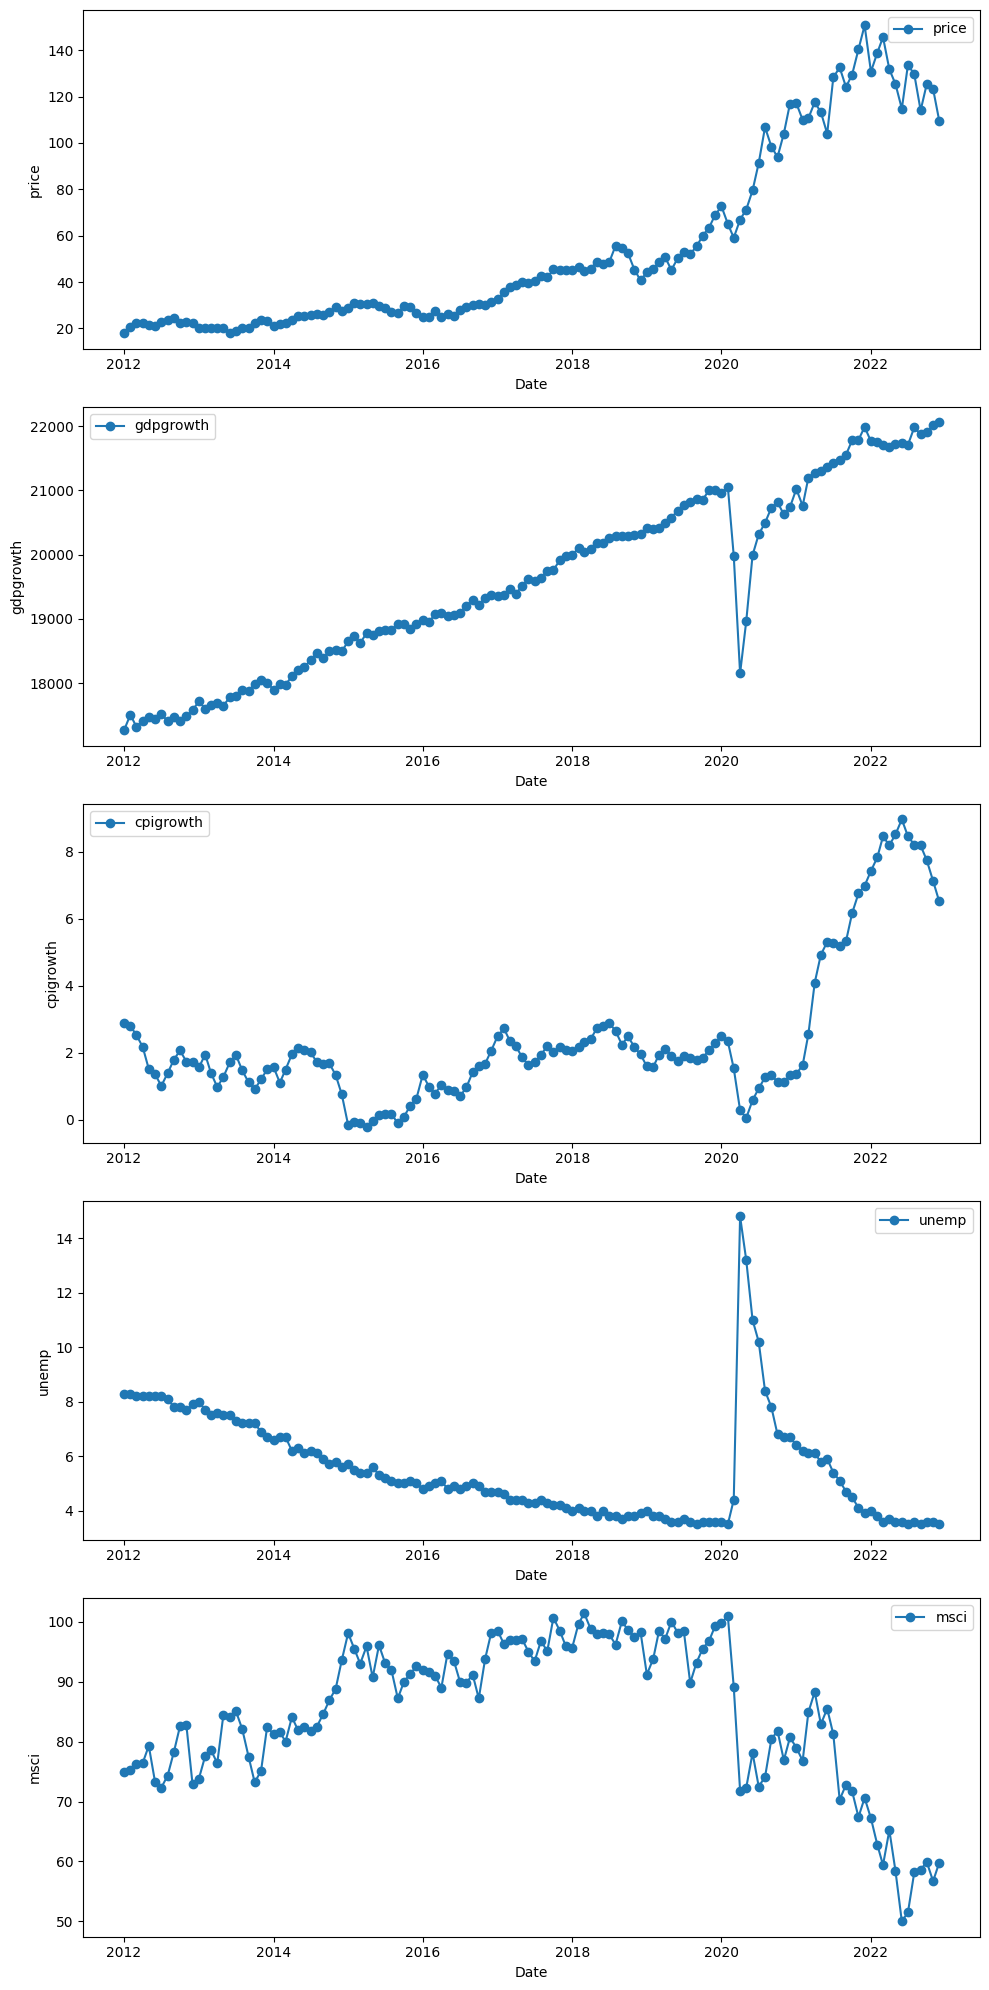

In [1]:
#This script performs a short preliminary analysis of the time series data at hand
# First section: visual inspection of all variables
# Second section: tests for stationarity, autocorrelation, and unit roots


import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import os as os

df = pd.read_csv('./tsdata/finalDF.csv', index_col='Date', parse_dates=True)
sentiment = pd.read_csv("./Sentiment_data/sentiment_scores.csv")

#Plotting time series
num_variables = len(df.columns)
fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(10, num_variables * 4))
if num_variables == 1:
    axes = [axes]
for ax, column in zip(axes, df.columns):
    ax.plot(df.index, df[column], label=f'{column}', marker='o')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.legend()

plt.tight_layout()
plt.show()

In [2]:
#From inspecting the graphs, we can clearly see non-stationary features from all variables under consideration, suggesting to difference/fitting and ARIMA model
# We can further test the hypothesis of stationarity by testing for unit roots using the Augemented Dickey fuller test. To test for autocorrelation, we use the Ljung-Box test.

def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series.name}: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] < 0.05:
        print("Evidence against null hypothesis, data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Performing ADF test on each column
for column in df.columns:
    perform_adf_test(df[column])

ADF Statistic for price: -1.9125459626539905
p-value: 0.3261823063224697
Critical Value (1%): -3.4865346059036564
Critical Value (5%): -2.8861509858476264
Critical Value (10%): -2.579896092790057
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary
ADF Statistic for gdpgrowth: -0.5212401817117266
p-value: 0.8878045478776695
Critical Value (1%): -3.482920063655088
Critical Value (5%): -2.884580323367261
Critical Value (10%): -2.5790575441750883
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary
ADF Statistic for cpigrowth: -1.8395275071142494
p-value: 0.36102136946785623
Critical Value (1%): -3.4870216863700767
Critical Value (5%): -2.8863625166643136
Critical Value (10%): -2.580009026141913
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary
ADF Statistic for unemp: -3.034740394075826
p-value: 0.03177500158895385
Critical Value (1%): -3.4812818022

In [ ]:
#From the results we can infer that there is strong evidence against the hypothesis of stationarity for almost all time series, except for the unemployment rate.
# Although, visual insepction suggests a trend component presnet in the data, which speaks for the presence of a unit root.
# Differencing reduces or eliminates these characteristics, aiming for stationarity.


def perform_ljungbox_test(series, lags=10):
    # Performing the Ljung-Box test
    lb_pvalue = acorr_ljungbox(series, lags=[lags], return_df=False)
    # Printing the test statistic and p-value
    print(f'Ljung-Box test statistic for {series.name} at lag {lags}: {lb_pvalue.iloc[0,1]}')
    print(f'p-value: {lb_pvalue.iloc[0,1]}')
    # Checking if the p-value indicates autocorrelation
    if lb_pvalue.iloc[0,1] < 0.05:
        print("Evidence against null hypothesis, data shows autocorrelation")
    else:
        print("Weak evidence against null hypothesis, data does not show autocorrelation")

# Performing Ljung-Box test on each column
for column in df.columns:
    perform_ljungbox_test(df[column])

#The test results give us strong evidence for autocorrelation in the data.
# The AR part of the model captures the relationship between a variable's current value and its previous values.
# If data show autocorrelation, it means past values have a correlation with current values, which the AR part can model effectively.

